In [12]:
import pandas as pd
from datetime import datetime
from zoe import cases, query, pickle, find_previous, plot_study, plot_study_evolution

In [59]:
uk_active_cases = query("SELECT * FROM uk_active_cases", index='date')
uk_active_cases.index = pd.to_datetime(uk_active_cases.index, format='%Y%m%d')
uk_active_cases

,cartodb_id,the_geom,the_geom_webmercator,corrected_covid_positive
date,,,,
2020-06-12,34805,None,None,85785.916027
2020-06-13,34806,None,None,79700.856247
2020-06-14,34807,None,None,74049.087537
2020-06-15,34808,None,None,68724.776483
2020-06-16,34809,None,None,63982.602540
...,...,...,...,...
2021-02-25,35063,None,None,152761.664458
2021-02-26,35064,None,None,150368.481139
2021-02-27,35065,None,None,148059.171029


In [60]:
curr_date = uk_active_cases.index.max()
print(pickle(uk_active_cases, 'uk_active_cases', curr_date))

/Users/chris/coronavirus/data/zoe_uk_active_cases_2021-03-01_2021-03-01-16-29.pickle


In [61]:
prev_date, prev_uk_active_cases = find_previous(curr_date)

/Users/chris/coronavirus/data/zoe_uk_active_cases_2021-02-28_2021-02-28-16-17.pickle


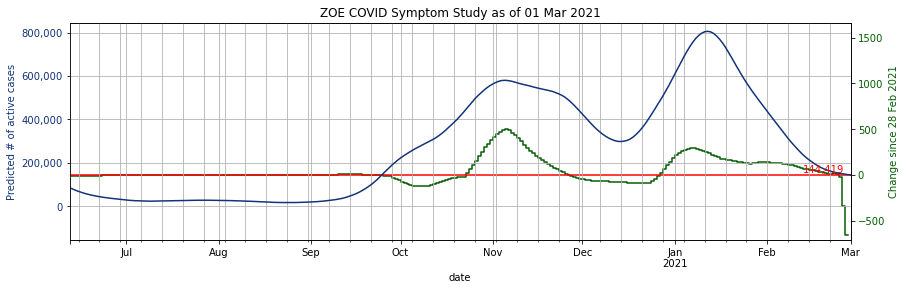

In [62]:
plot_study(curr_date, prev_date, uk_active_cases, prev_uk_active_cases)

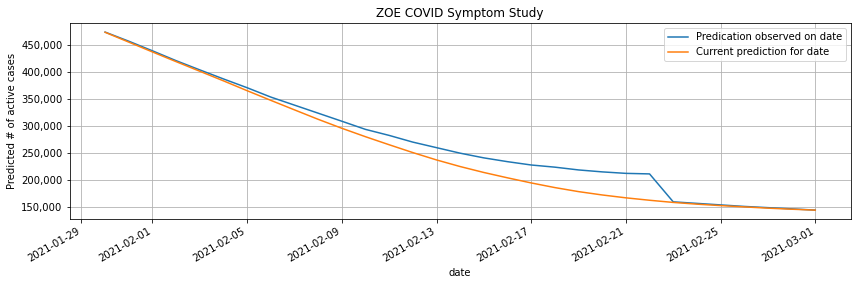

In [63]:
plot_study_evolution(curr_date, days=30)

In [64]:
prevalence_map = query("SELECT * FROM prevalence_map")
prevalence_map['percentage'] = prevalence_map['percentage'].astype(float)

In [65]:
for_date, = prevalence_map['data_status'].unique()
print(pickle(prevalence_map, 'prevalence_map', datetime.strptime(for_date, '%H:%M:%S %d-%m-%Y')))

/Users/chris/coronavirus/data/zoe_prevalence_map_2021-03-01_2021-03-01-16-29.pickle


In [66]:
prevalence_map[['lad16nm', 'lad16cd', 'percentage']].sort_values('percentage', ascending=False)[:10]

,lad16nm,lad16cd,percentage
69,Dacorum,E07000096,1.069660
295,East Renfrewshire,S12000011,0.832327
15,"Kingston upon Hull, City of",E06000010,0.823876
300,Bradford,E08000032,0.725663
245,Warwick,E07000222,0.682821
19,Derby,E06000015,0.679584
100,Erewash,E07000036,0.673358
385,Monmouthshire,W06000021,0.660749
260,Coventry,E08000026,0.642675
205,Ashfield,E07000170,0.619077
